<a href="https://colab.research.google.com/github/jay10440/statistical-analysis/blob/main/Multiple_Linear_Regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multiple Linear Regression


In [ ]:
#Necessary Packages and Pulling Libraries:
install.packages("MASS")
install.packages("tidyverse")
install.packages("ISLR")
install.packages("ISLR2")
#From here on out, we'll use pacman-> install.packages("pacman"), library(pacman)
#pacman::p_load(package A, package B, ...)
library(MASS)
library(tidyverse)
library(ISLR)
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ISLR2’


The following objects are masked from ‘package:ISLR’:

    Auto, Credit


T

In [ ]:
#Currently we care about "Auto". Let's load that up.
attach(Auto)

The following object is masked from package:lubridate:

    origin


The following object is masked from package:ggplot2:

    mpg




In [ ]:
#Taking a look at the data:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


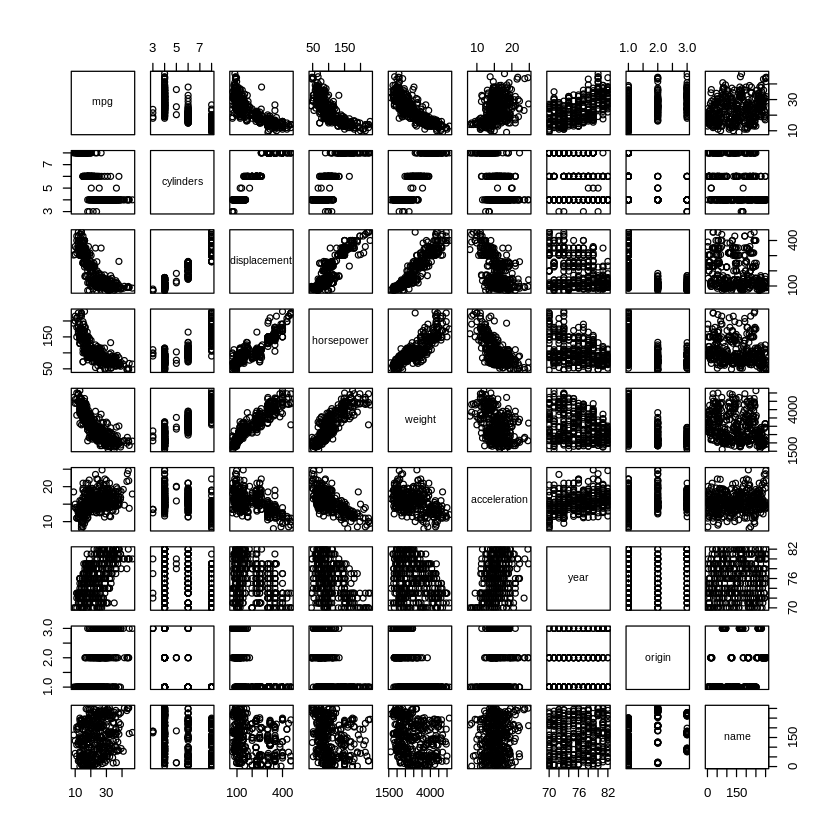

In [ ]:
#Let's try a scatterplot:
pairs(Auto)

In [ ]:
#First, I want to take out the non-numeric portion of this data, we'll use sapply:
numeric_vars_auto <- Auto[sapply(Auto, is.numeric)]
cor(numeric_vars_auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


In [ ]:
#Performing a multi-linear regression: mpg - predictors
lm.fit=lm(mpg ~ .-name, data=Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


In R, we can see that it generally tells us which variables in a linaer multivariable regression are statistically significant. This is generally denoted using the asterisk. ***

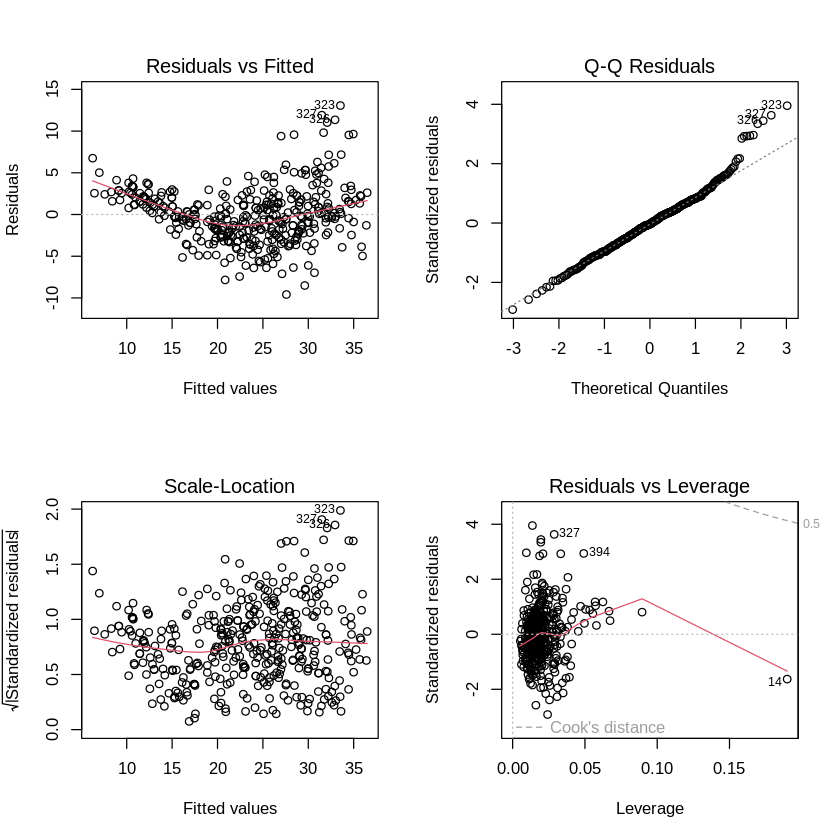

In [ ]:
par(mfrow=c(2,2))
plot(lm.fit)

Q-Q Residuals tells me there may be some non-linearity. This makes sense looking at the data, some of these do have negative correlations but do not follow linearity all the way.

The fitted vs Residuals have a spreading conical shape. This suggests there are issues with constant variance. This is also seen in the scatterplot, so there may be a better model to use with respect to correlation.

In [ ]:
#Trying a log Transformation on weight and year
lm.fit_log_weightyear = lm(mpg ~ log(weight)+ log(year), data=Auto)
summary(lm.fit_log_weightyear)


Call:
lm(formula = mpg ~ log(weight) + log(year), data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-9.286 -1.929 -0.073  1.757 13.794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -67.6535    16.9028  -4.003 7.51e-05 ***
log(weight) -20.5402     0.5953 -34.502  < 2e-16 ***
log(year)    58.8046     3.4487  17.051  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.173 on 389 degrees of freedom
Multiple R-squared:  0.8356,	Adjusted R-squared:  0.8347 
F-statistic: 988.3 on 2 and 389 DF,  p-value: < 2.2e-16


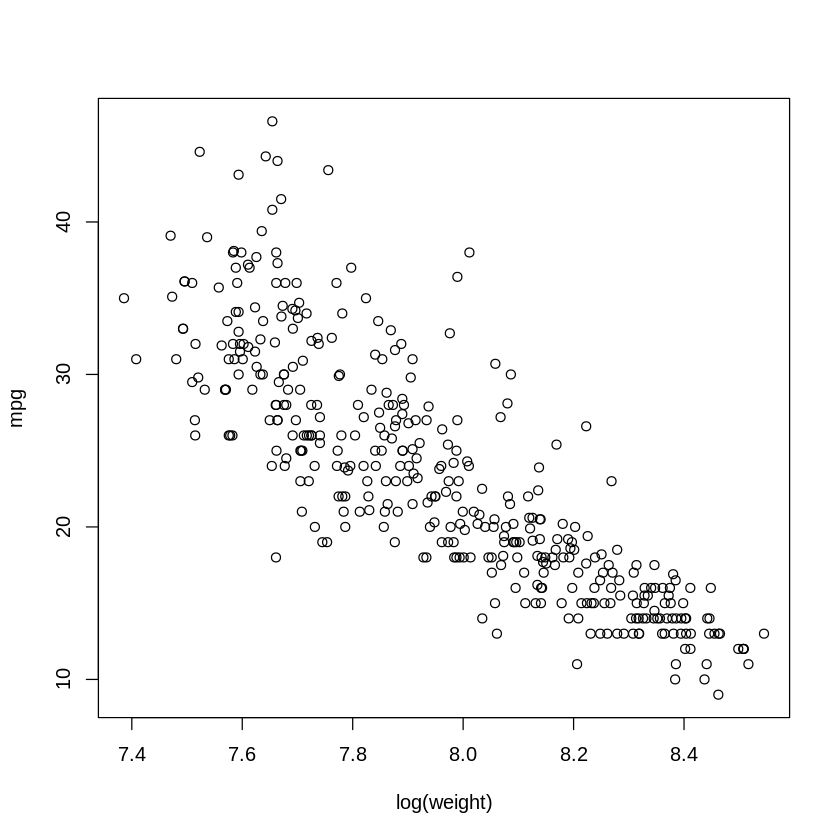

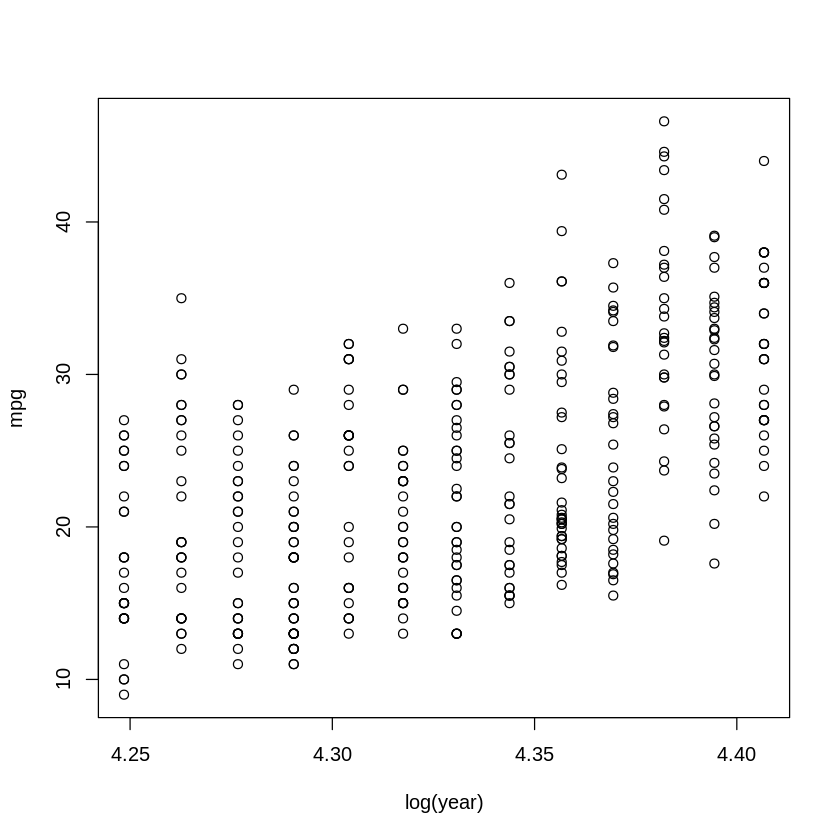

In [ ]:
plot(log(weight),mpg)
plot(log(year),mpg)

In [ ]:
lm.fit_logweight=lm(mpg ~ log(weight), data=Auto)

In [ ]:
summary(lm.fit_logweight)


Call:
lm(formula = mpg ~ log(weight), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4315  -2.6752  -0.2888   1.9429  16.0136 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 209.9433     6.0002   34.99   <2e-16 ***
log(weight) -23.4317     0.7534  -31.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.189 on 390 degrees of freedom
Multiple R-squared:  0.7127,	Adjusted R-squared:  0.7119 
F-statistic: 967.3 on 1 and 390 DF,  p-value: < 2.2e-16
